In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
data_path = 'adult/adult.data'
column_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
data = pd.read_csv(data_path, names=column_names, sep = ",", skipinitialspace=True,  header=None)
data["wage_class"] = data["wage_class"].map({"<=50K": 0, ">50K": 1})
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [3]:
data["workclass"] = data["workclass"].replace({"Never-worked": "?", "Without-pay": "?"})
data.sex = data.sex.replace({"Male": 0, "Female": 1})
data.capital_gain = (data.capital_gain > 0).astype(int)
data.capital_loss = (data.capital_loss > 0).astype(int)
data.native_country = (data.native_country == "United-States").astype(int)

C:\Users\mlempicki\AppData\Local\Temp\ipykernel_32224\559932236.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.sex = data.sex.replace({"Male": 0, "Female": 1})


In [4]:
data = data.drop(["education"], axis=1)
data.rename({"native_country": "us_native"}, axis=1, inplace=True)
data = data.drop(["fnlwgt"], axis=1)

In [5]:
data.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,us_native,wage_class
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,0,1,0,40,1,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,0,13,1,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,0,40,1,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,0,40,1,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,1,0,0,40,0,0


In [6]:
X = data.drop(["wage_class"], axis=1)
y = data.wage_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
num_columns = ["age", "education_num", "hours_per_week"]
cat_columns = ["workclass", "marital_status", "occupation", "relationship", "race"]
bin_columns = ["sex", "capital_gain", "capital_loss", "us_native"]

num_pipe = Pipeline([
    ("scaler", StandardScaler())
])
cat_pipe = Pipeline([
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

In [13]:
preprocessor = ColumnTransformer([
    ("num", num_pipe, num_columns),
    ("cat", cat_pipe, cat_columns),
    ("bin", "passthrough", bin_columns)
])

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'education_num', 'hours_per_week']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['workclass', 'marital_status', 'occupation',
                                  'relationship', 'race']),
                                ('bin', 'passthrough',
                                 ['sex', 'capital_gain', 'capital_loss',
                                  'us_native'])])

In [17]:
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", LogisticRegression())
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression())])

In [18]:
preprocessor.transformers

[('num',
  Pipeline(steps=[('scaler', StandardScaler())]),
  ['age', 'education_num', 'hours_per_week']),
 ('cat',
  Pipeline(steps=[('encoder',
                   OneHotEncoder(drop='first', handle_unknown='ignore'))]),
  ['workclass', 'marital_status', 'occupation', 'relationship', 'race']),
 ('bin', 'passthrough', ['sex', 'capital_gain', 'capital_loss', 'us_native'])]

In [21]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)

array([0, 0, 1, ..., 1, 0, 0])

In [24]:
accuracy_score(y_test, pipeline.predict(X_test))

0.8510670965760786

In [22]:
pipeline.named_steps["preprocessor"].transformers_[1][1].steps[0][1].categories_

[array(['?', 'Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc',
        'Self-emp-not-inc', 'State-gov'], dtype=object),
 array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
        'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
       dtype=object),
 array(['?', 'Adm-clerical', 'Armed-Forces', 'Craft-repair',
        'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
        'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
        'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
        'Transport-moving'], dtype=object),
 array(['Husband', 'Not-in-family', 'Other-relative', 'Own-child',
        'Unmarried', 'Wife'], dtype=object),
 array(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other',
        'White'], dtype=object)]

### Zoptymalizuj siłę regularyzcji w reg. log. w tym pipelinie. Na skali logarytmicznej od 10^-5 do 10^5. Wykorzystaj: np.logspace.
#### Pamiętaj od zapewnienieu losowania kolejności w podziale na foldy. Przetestować na danych testowych.

In [26]:
param_grid = {
    "model__C": np.logspace(-5, 5, 11)
}

cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

{'model__C': np.float64(1.0)}


0.8510670965760786

In [27]:
optimizer.cv_results_["mean_test_score"]

array([0.75929012, 0.75990443, 0.82340308, 0.83918162, 0.84175345,
       0.84209893, 0.84206051, 0.84194532, 0.84190694, 0.84202212,
       0.84202214])

### W jednym GridSearchCV zoptymalizuj rozwiązanie wykorzystujące regresję lub drzewo. W regresji zoptymalizuj C, a w drzewie minimalną liczbę obserwacji w liściach. 
#### Dobierz odpowiednie przekształcenia do modeli. Podaj najlepszy wariant i jego jakosć.

In [28]:
param_grid = [
    {
        "preprocessor__num__scaler": [StandardScaler()],
        "model__C": np.logspace(-5, 5, 11),
        "model": [LogisticRegression()],
    },
    {
        "preprocessor__num__scaler": [None],
        "preprocessor__cat__encoder__drop": [None],
        "model__min_samples_leaf": [5, 10, 100, 1000],
        "model": [DecisionTreeClassifier()],   
    }
]
param_grid

[{'preprocessor__num__scaler': [StandardScaler()],
  'model__C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
         1.e+03, 1.e+04, 1.e+05]),
  'model': [LogisticRegression()]},
 {'preprocessor__num__scaler': [None],
  'preprocessor__cat__encoder__drop': [None],
  'model__min_samples_leaf': [5, 10, 100, 1000],
  'model': [DecisionTreeClassifier()]}]

In [29]:
cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="accuracy", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

accuracy_score(y_test, optimizer.best_estimator_.predict(X_test))

{'model': LogisticRegression(), 'model__C': np.float64(100.0), 'preprocessor__num__scaler': StandardScaler()}


0.8510670965760786

In [30]:
pipeline.set_params(**optimizer.best_params_)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'education_num',
                                                   'hours_per_week']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['workclass',
                                                   'marital_status',
                                                   'occupation', 'relationship',
                                                   'race']),
                                                 ('bin', 'passthrough',
                                                  ['sex', 'capital_gain',
                                                   'capital_loss',
                                                   'us_native'])])),
                ('model', LogisticRegression(C=np.float64(100.0)))])

In [31]:
from copy import deepcopy

pipelne_new = deepcopy(pipeline)

In [32]:
cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring="roc_auc", n_jobs=-1)
optimizer.fit(X_train, y_train)

print(optimizer.best_params_)

{'model': LogisticRegression(C=np.float64(100.0)), 'model__C': np.float64(1000.0), 'preprocessor__num__scaler': StandardScaler()}


In [33]:
from sklearn.metrics import roc_auc_score

In [34]:
y_probs = optimizer.best_estimator_.predict_proba(X_test)[:, 1] # prawdopodobieństwa jedynek

roc_auc_score(y_test, y_probs)

np.float64(0.9007381230162951)

In [35]:
from sklearn.metrics import precision_score

accuracy_score(y_test, y_probs>0.5), precision_score(y_test, y_probs>0.5)

(0.8512206356517734, np.float64(0.7336956521739131))

In [36]:
from sklearn.metrics import fbeta_score

fbeta_score?

Signature:
fbeta_score(
    y_true,
    y_pred,
    *,
    beta,
    labels=None,
    pos_label=1,
    average='binary',
    sample_weight=None,
    zero_division='warn',
)
Docstring:
Compute the F-beta score.

The F-beta score is the weighted harmonic mean of precision and recall,
reaching its optimal value at 1 and its worst value at 0.

The `beta` parameter represents the ratio of recall importance to
precision importance. `beta > 1` gives more weight to recall, while
`beta < 1` favors precision. For example, `beta = 2` makes recall twice
as important as precision, while `beta = 0.5` does the opposite.
Asymptotically, `beta -> +inf` considers only recall, and `beta -> 0`
only precision.

The formula for F-beta score is:

.. math::

   F_\beta = \frac{(1 + \beta^2) \text{tp}}
                    {(1 + \beta^2) \text{tp} + \text{fp} + \beta^2 \text{fn}}

Where :math:`\text{tp}` is the number of true positives, :math:`\text{fp}` is the
number of false positives, and :math:`\text{fn}` i

In [37]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)

cv = KFold(10, shuffle=True)
optimizer = GridSearchCV(pipeline, param_grid, cv=cv, scoring=ftwo_scorer, n_jobs=-1)

In [38]:
from sklearn.ensemble import BaggingClassifier

?BaggingClassifier

Init signature:
BaggingClassifier(
    estimator=None,
    n_estimators=10,
    *,
    max_samples=1.0,
    max_features=1.0,
    bootstrap=True,
    bootstrap_features=False,
    oob_score=False,
    warm_start=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
)
Docstring:     
A Bagging classifier.

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

This algorithm encompasses several works from the literature. When random
subsets of the dataset are drawn as random subsets of the samples, then
this algorithm is known as Pasting [1]_. If samples are drawn with
replaceme

### Zwizualizuj jakość (auc) Baggingu w zależności od liczby drzew (przy innych parametrach domyślnych)

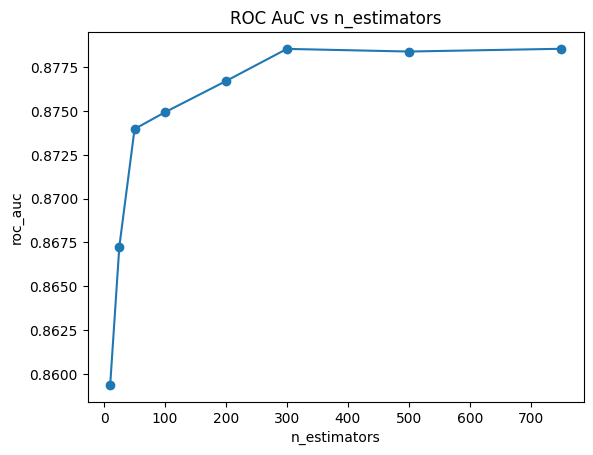

In [39]:
n_estimators = [10, 25, 50, 100, 200, 300, 500, 750]

estimators_roc_auc = []
for n in n_estimators:
    model = BaggingClassifier(None, n, n_jobs=-1)
    pipeline = Pipeline([
            ("preprocessor", preprocessor),
            ("model", model),
        ],
    )
    pipeline.fit(X_train, y_train)
    y_probs = pipeline.predict_proba(X_test)[:, 1]
    estimators_roc_auc.append(roc_auc_score(y_test, y_probs))

plt.plot(n_estimators, estimators_roc_auc, label="n_estimators", marker="o")
plt.xlabel("n_estimators")
plt.ylabel("roc_auc")
plt.title("ROC AuC vs n_estimators")
plt.show()